# Statistics - Code Demonstration
We show some code related to statistics. 
- First we demonstrate some probability calculations. 
- Secondly we give an example where we do some statistical analysis.

The purpose is to give a short overview of some possibilities and you are encouraged to explore, the documentation for instance, for further details. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as st
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t

#import statsmodels.api as sm

# Probability Calculations

### Binomial Distribution
$X \sim Bin(n=5, p=0.4)$

In [4]:
# a) P(X = 3)
print(f'{binom.pmf(3, 5, 0.4):.3f}')

# b) P(X <= 3)
print(f'{binom.cdf(3, 5, 0.4):.3f}')

# b) P(X > 2)
print(f'{(1 - binom.cdf(2, 5, 0.4)):.3f}')

0.230
0.913
0.317


### Normal Distribution
$Z \sim N(0, 1)$

In [5]:
# a) P(Z < 1.43)
print(f'{norm.cdf(1.43):.3f}')

# b) P(Z > 1.43)
print(f'{(1 - norm.cdf(1.43)):.3f}')

# c) P(-0.75 < Z <= 1.8)
print(f'{(norm.cdf(1.8) - norm.cdf(-0.75)):.3f}')

0.924
0.076
0.737


### Example on Inverse CDF / Quantile

In [6]:
# For a given z-value, what is the probability?
# P(Z <= 1.96)
print(f'{norm.cdf(1.96):.3f}')

# For a given probability, what is the z-value?
# P(Z <= z) = 0.975
print(f'{norm.ppf(0.975):.3f}')

0.975
1.960


# Example - Statistics
We will do the following:
1. Generate normal distributed data.
2. Do some plots. 
3. Calculate some descriptive statistics such as mean and std.
4. Calculate a confidence interval manually and by a built-in function.  
5. Perform hypothesis testing manually and by a built-in function.  
6. Shapiro-Wilk normality test.

### Data generation and plots

NameError: name 'sm' is not defined

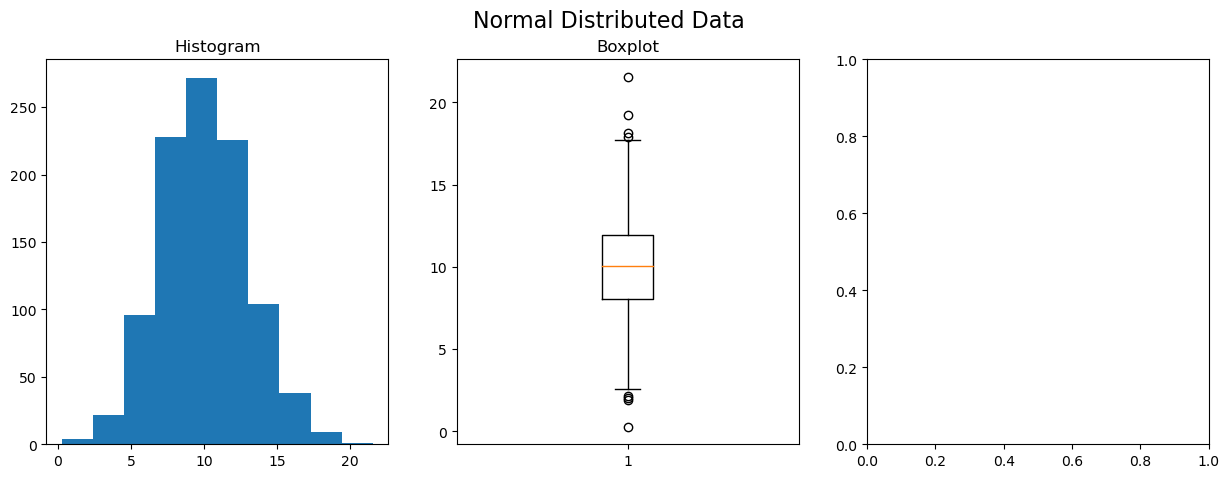

In [7]:
# Simulate data
#np.random.seed(42)  # Set the random seed for reproducible results.
#x = norm.rvs(10, 3, 1000)

# Visualize the data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Normal Distributed Data', fontsize=16)

axs[0].hist(x)
axs[0].set_title('Histogram')

axs[1].boxplot(x)
axs[1].set_title('Boxplot')

sm.qqplot(x, line='45', fit = True, ax=axs[2])
axs[2].set_title('QQ Plot')

### Descriptive statistics

In [6]:
print(f'Mean: {np.mean(x):.2f}')
print(f'Std: {np.std(x):.2f}')
print(f'Median: {np.median(x):.2f}')
print(f'Minimum: {np.min(x):.2f}')
print(f'Maximum: {np.max(x):.2f}')

Mean: 10.06
Std: 2.94
Median: 10.08
Minimum: 0.28
Maximum: 21.56


### Confidence interval

To calculate the confidence interval, we use the following formula: $\overline{x} \pm t \cdot \frac{s}{\sqrt{\displaystyle n}}$ where the quantile, t, from the t-distribution has $n-1$ degrees of freedom.

In [7]:
# Calculate a 95% confidence interval manually
mean = np.mean(x)
std = np.std(x, ddof=1)
n = np.size(x)
ci_perc = 0.95

quantile = t.ppf(1 - (1 - ci_perc) / 2, n-1)

ci_lower = mean - quantile*(std/np.sqrt(n))
ci_upper = mean + quantile*(std/np.sqrt(n))

print(ci_lower, ci_upper)

9.875701355809893 10.24029097912406


In [8]:
# Calculate a 95% confidence interval by using a built in function
t.interval(0.95, n-1, mean, std/np.sqrt(n))

(9.875701355809893, 10.24029097912406)

### Hypothesis testing

To test the hypotheses we use the test statistic: 
 $t = \frac{\overline{x} - \mu}{s/\sqrt{n}}$ where we use $n-1$ degrees of freedom for the t-distribution.

Testing the hypothesis: 

$H_{0}: \mu = 10$

$H_{1}: \mu \ne 10$

In [9]:
# Doing the hypothesis test manually
t_obs = (mean - 10)/(std/np.sqrt(n))
p_value = 2*(1 - t.cdf(t_obs, n-1))

print('t_obs', t_obs)
print('p-value', p_value)

t_obs 0.6243089585093191
p-value 0.5325672436623026


In [10]:
st.ttest_1samp(x, 10)

Ttest_1sampResult(statistic=0.6243089585093191, pvalue=0.5325672436623027)

Testing the hypothesis: 

$H_{0}: \mu = 8$

$H_{1}: \mu \ne 8$

In [11]:
st.ttest_1samp(x, 8)

Ttest_1sampResult(statistic=22.153626697127358, pvalue=8.918191734245118e-89)

### Shapiro-Wilk normality test

In [8]:
st.shapiro(x)

ShapiroResult(statistic=0.9986080527305603, pvalue=0.6264819502830505)

In [ ]:
import geopandas as gpd
import matplotlib.patches as mpatches
 
# Plottning av Q6
 
# load the low resolution world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
 
# Step 1, göra en basic world map
fig, ax = plt.subplots(figsize=(20, 10))
 
# drop "Antarctica" and "Seven seas" from the dataframe (which will make our
# world map visualization a bit prettier)
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)
 
# plot a basic map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)
 
# Step 2
# grab the unique set countries, generate a unique color for each one,
# and initialize the list of patches
# hämta SQL data för
 
countries = list(set(df6.Country.to_list()))
 
sales_persons = df6[df6["PersonType"] == 'Sales Person'].Nbr
customers = df6[df6["PersonType"] == 'Individual (retail) customer'].Nbr
 
colors = sns.color_palette("Set3", len(countries))
patches = []
 
# loop over the continent names and corresponding colors
for (country_name, color, nbr_sales_person, nbr_customers) in list(zip(countries, colors, sales_persons, customers)):
    # grab all countries that belong to the continent, then plot each of the
    # continents, giving each a unique color
 
    countries = world[world['name'] == country_name]
    countries.plot(ax=ax, color=color, alpha=0.5)
 
    # generate a patch for the current continent
    patch = mpatches.Patch(label=f"{country_name}: {nbr_customers} retail customer / {nbr_sales_person} Sales Person", color=color)
    patches.append(patch)
 
# add the patches to the map
ax.legend(handles=patches, loc="lower left")
 
# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])
 
# set the plot title
plt.title("Countries with customers and sales persons")
plt.show()
 